# <b>MODEL CREATION AND TESTING</b>

This notebook will be focus on the regression model, however it will also have a series of visualization plots and other tools that will be use to keep on evaluating the data and to answer the following questions:

* In which of area can you invest money in property or buy as a main home based on different budgets?
* What is the price per square foot in each one of those areas?
* How many bedrooms can I afford?
* Can I afford a new home? or do I have to buy and older one?

To make it simpler, instead of dealing with the 70 different postcodes the area has been divided into 4 sectors/quadrants. This is probably not the ideal case scenario for a home buyer but it can be for an investor 

## Libraries

Below is the list of the libraries that will be use for the entire notebook:

In [1]:
import  pandas as pd
import  numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium.plugins import HeatMap

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
# These two lines are to ingnore warnings that normally are within pink boxes

import warnings
warnings.filterwarnings('ignore')

## Data Loading and viewing

In [3]:
df1 = pd.read_csv('df_cleaned_1.csv', index_col=0)
pd.set_option('display.max_columns', 500) # Allows to display up to 500 columns
df1.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year_sale,renovation,sector_1,sector_2,sector_3,sector_4,Grade_A,Grade_C,Grade_D
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,3,0.0,1955,98178,47.5112,-122.257,1340,5650,2014,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,400.0,1951,98125,47.7210,-122.319,1690,7639,2014,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,0.0,1933,98028,47.7379,-122.233,2720,8062,2015,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,910.0,1965,98136,47.5208,-122.393,1360,5000,2014,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,0.0,1987,98074,47.6168,-122.045,1800,7503,2015,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df1.shape

(20240, 25)

The .shape indicates that we have 24 columns. It is more than what thee database initially had because some of them have been engineered

In [5]:
df1.info() # Quick check on data types and number of rows for each column 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20240 entries, 0 to 21596
Data columns (total 25 columns):
id               20240 non-null int64
price            20240 non-null float64
bedrooms         20240 non-null int64
bathrooms        20240 non-null float64
sqft_living      20240 non-null int64
sqft_lot         20240 non-null int64
floors           20240 non-null float64
waterfront       20240 non-null float64
condition        20240 non-null int64
sqft_basement    20240 non-null float64
yr_built         20240 non-null int64
zipcode          20240 non-null int64
lat              20240 non-null float64
long             20240 non-null float64
sqft_living15    20240 non-null int64
sqft_lot15       20240 non-null int64
year_sale        20240 non-null int64
renovation       20240 non-null int64
sector_1         20240 non-null float64
sector_2         20240 non-null float64
sector_3         20240 non-null float64
sector_4         20240 non-null float64
Grade_A          20240 non-null f

In [6]:
df1.describe() # Quick check on the statistics of each one of the colums

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year_sale,renovation,sector_1,sector_2,sector_3,sector_4,Grade_A,Grade_C,Grade_D
count,2.024000e+04,2.024000e+04,20240.000000,20240.000000,20240.000000,2.024000e+04,20240.000000,20240.000000,20240.000000,20240.000000,20240.000000,20240.000000,20240.000000,20240.000000,20240.000000,20240.000000,20240.000000,20240.000000,20240.000000,20240.000000,20240.000000,20240.000000,20240.000000,20240.000000,20240.000000
mean,4.604291e+09,4.772575e+05,3.328804,2.053286,1975.765662,1.462167e+04,1.477050,0.003854,3.407460,261.023468,1970.903755,98078.464130,47.556897,-122.213043,1922.639575,12446.676532,2014.324901,0.030583,0.270751,0.403409,0.242045,0.078360,0.012945,0.157609,0.000247
std,2.877514e+09,2.062737e+05,0.882515,0.709023,772.005650,4.017194e+04,0.537036,0.061960,0.646253,405.508417,29.163761,53.297411,0.141151,0.142396,613.878116,26556.400066,0.468349,0.172189,0.444359,0.490594,0.428332,0.268743,0.113039,0.364383,0.015716
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.132076e+09,3.160000e+05,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,3.000000,0.000000,1952.000000,98033.000000,47.460100,-122.330000,1470.000000,5040.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.905081e+09,4.390000e+05,3.000000,2.000000,1860.000000,7.500000e+03,1.000000,0.000000,3.000000,0.000000,1975.000000,98065.000000,47.567000,-122.231000,1800.000000,7537.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.338200e+09,6.000000e+05,4.000000,2.500000,2430.000000,1.031625e+04,2.000000,0.000000,4.000000,500.000000,1996.000000,98118.000000,47.679900,-122.122000,2280.000000,9880.750000,2015.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.900000e+09,1.100000e+06,11.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,5.000000,2720.000000,2015.000000,98199.000000,47.777600,-121.315000,4950.000000,871200.000000,2015.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dealing with categoricals

From the data cleaning and visualization the following categoricals have been identified:

* waterfront
* condition
* renovation: This is an engineered column done with a simple 1 for houses being renovated, and 0 for not renovated
* grades: Because there were 11 grades, it was decided to binned them into 4 general grades (details in the Data Cleaning notebook)
* zipcode: as mentioned above, 4 differentt sectors/quadrants were made based on lat/long, which will replace the zipcodes, therefore zipcode was dropped
* months: month_sale was an engineered column, however due to the high correlation with year_sale it was decided to drop it and maybe use it for other more detail individual analysis later on.
   

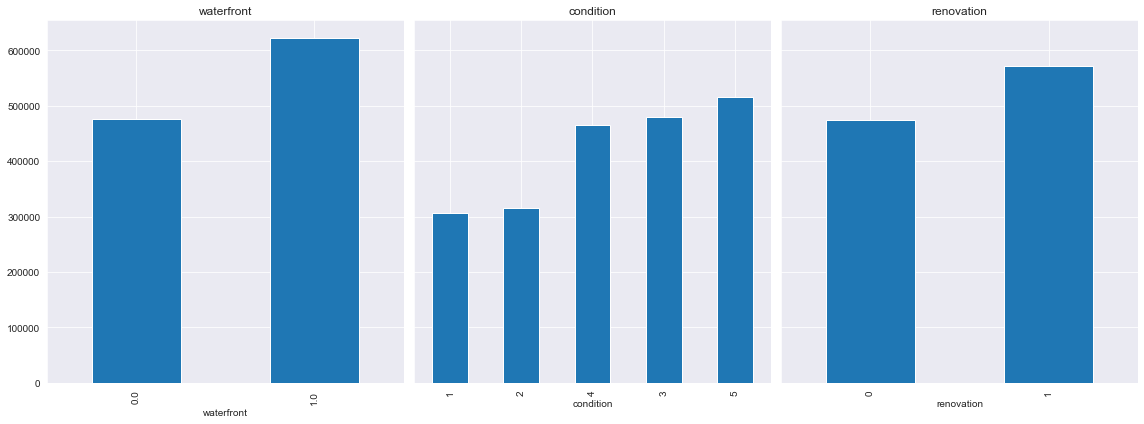

In [7]:
# These plots are for the 3 categorical variables that I will be working with: 

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6), sharey=True)

categoricals = ['waterfront', 'condition', 'renovation']

for col, ax in zip(categoricals, axes.flatten()):
    (df1.groupby(col).mean()['price'].sort_values().plot.bar(ax=ax))
    
# The previous for loop is doing the following per selected plot:
# .groupby(col) = groups the values together by column of interest
# .mean()['price'] = takes the mean of the price for each group
# .bar(ax=ax) = creates a bar graph on the ax 
# set_title(col) = takes the column title ans uses it as the graph title

    ax.set_title(col)
fig.tight_layout()


Before I create the dummy variables I will also look at each column in a scatter plot plotted against the price. Remember that I put a threshold for the house prices at 1.1 million US$, hence the plots will be cropped on the top.

Now I know these are a lot of plots, but this will be very useful to better understand the data distribution of each variable, so it is also a part of the EDA.

In [8]:
# I have commented this plots to make this Notebook slightly shorter. Please un-comment 
# to better understand the "OBSERVATIONS" below.

#for col in df1.columns:
#    plt.scatter(df1[col], df1.price, label=col)
#    plt.legend()
#    plt.xlabel(col)
#    plt.ylabel('price')
#    plt.title(col)
#    plt.show()

In [9]:
#for col in df1.columns:
#   sns.lmplot(x= col, y = 'price', data = df1, line_kws={'color': 'red'})
#    plt.show()

# These plot were commented to avoid making the notebook longer than what it already is.
# Uncomment it to better understand the Observations described below

OBSERVATIONS:

* bedroom vs price: It is clear that in average, the house price increases with increasing number of bedrooms until a number of 6 is reached. After this, the average price starts to decrease. This is interesting to take into account, as for large families it might be interesting to look at houses with more than 6 bedrooms.

* Bathrooms vs price: The more bathrooms you have, the more expensive the house seems to get.

* Square footage vs price: The price of the square foot increases in average with the increase of the house size, however, as house increase their size the error increases given space for large variations which I believe will be related to other variables such as the zipcode and waterfront location. 

* square foot of the lot vs price: This plot has too many outliers so the analyzes will be biased and erroneous. For more inside to this I will generate on a separate notebook a separate plot with the data filtered from outliers and using the rule of the 3 standard deviations

* floors vs price: This is a similar case as with the bedrooms. It seems as the price of the properties increases up to a certain point and then it start to decrease. 

* waterfront and condition are both categoricals so hard to make a comment with these type of plots. However, as I have plotted the house prices on a map, I know that the most expensive homes are on the waterfront, and that in average, the better the condition of the house the more expensive it will be, but again there comes a point where the conditions get better but the price decreases or stays the same

* According to the description of each category, the sqft_living seems to be the same as the sqft_living_15 and the same goes for sqft_lot and sqft_lot15. 

* The sqft_living = sqft_above + sqft_basement


In [10]:
# I will now define the three categoricals that I will be working with,
# proceed to generate dummies for each one, drop the columns from the df1
# and concatenate the new dataframes with df1

categoricals = ['waterfront', 'condition', 'renovation']

In [11]:
waterfront_dummies = pd.get_dummies(df1['waterfront'], prefix='waterfront', drop_first=True)
condition_dummies = pd.get_dummies(df1['condition'], prefix='condition', drop_first=True)
renovation_dummies = pd.get_dummies(df1['renovation'], prefix='renovation', drop_first=True)

In [12]:
df1 = df1.drop(['waterfront', 'condition', 'renovation'], axis=1)

In [13]:
df1 = pd.concat([df1, waterfront_dummies, condition_dummies, renovation_dummies], axis=1)

In [14]:
df1.head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year_sale,sector_1,sector_2,sector_3,sector_4,Grade_A,Grade_C,Grade_D,waterfront_1.0,condition_2,condition_3,condition_4,condition_5,renovation_1
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,1955,98178,47.5112,-122.257,1340,5650,2014,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,400.0,1951,98125,47.7210,-122.319,1690,7639,2014,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1


In [15]:
# This correlation of all the columns will start to give me an idea of possible 
# colinearity and multicollinearity. Some of the pairs with very high correlations 
# (75% and higher) will require to chose one to be dropped

df1.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year_sale,sector_1,sector_2,sector_3,sector_4,Grade_A,Grade_C,Grade_D,waterfront_1.0,condition_2,condition_3,condition_4,condition_5,renovation_1
id,1.000000,0.008363,0.010588,0.022030,0.005691,-0.133340,0.028666,-0.005046,0.024346,-0.005415,0.001903,0.019442,0.010197,-0.143183,0.007544,0.004754,0.025754,-0.047286,0.019330,-0.025267,0.005355,-0.002169,-0.005229,-0.012615,0.032979,-0.026487,-0.011323,-0.013961
price,0.008363,1.000000,0.300063,0.452300,0.618677,0.093582,0.270434,0.228628,0.057338,-0.017014,0.432423,0.071376,0.560416,0.082204,-0.001962,0.083247,0.392985,-0.399826,-0.216224,-0.128094,0.516356,0.038084,0.043895,-0.070356,0.016555,-0.034114,0.054649,0.080979
bedrooms,0.010588,0.300063,1.000000,0.505143,0.602248,0.025661,0.159999,0.280208,0.166451,-0.155307,-0.034435,0.146664,0.384407,0.022853,-0.008274,-0.189478,0.137095,0.050871,-0.015100,-0.133306,0.212668,0.015518,-0.023174,-0.049063,0.006039,-0.003040,0.014980,0.000803
bathrooms,0.022030,0.452300,0.505143,1.000000,0.716492,0.064710,0.501773,0.215440,0.544707,-0.207450,-0.011003,0.248697,0.528287,0.064760,-0.031195,-0.184389,0.183939,0.023908,-0.062690,-0.155485,0.405016,0.040943,-0.013391,-0.074971,0.201532,-0.171381,-0.046274,0.022569
sqft_living,0.005691,0.618677,0.602248,0.716492,1.000000,0.159103,0.338984,0.366731,0.353787,-0.205491,0.008320,0.286985,0.737433,0.173210,-0.034371,-0.247977,0.248099,0.004216,-0.043059,-0.152054,0.565531,0.061336,-0.002354,-0.066539,0.114181,-0.083717,-0.039016,0.018162
sqft_lot,-0.133340,0.093582,0.025661,0.064710,0.159103,1.000000,-0.017602,0.011888,0.041871,-0.129664,-0.094877,0.222392,0.142776,0.708722,-0.000291,-0.140272,0.018450,0.116767,0.016034,0.025670,0.110491,0.006239,0.026855,0.042724,-0.019659,0.018531,-0.010760,0.007530
floors,0.028666,0.270434,0.159999,0.501773,0.338984,-0.017602,1.000000,-0.293541,0.511911,-0.064401,0.035787,0.135031,0.267348,-0.021803,-0.023688,0.027799,0.048269,-0.010218,-0.115749,-0.083823,0.323749,0.009453,-0.009963,-0.052285,0.331034,-0.265600,-0.133033,-0.004432
sqft_basement,-0.005046,0.228628,0.280208,0.215440,0.366731,0.011888,-0.293541,1.000000,-0.150701,0.093326,0.097432,-0.150353,0.116761,0.013369,-0.014103,0.066955,0.040870,-0.125535,0.011507,-0.063401,-0.010876,0.002596,0.018967,-0.023009,-0.158225,0.106655,0.117035,0.039497
yr_built,0.024346,0.057338,0.166451,0.544707,0.353787,0.041871,0.511911,-0.150701,1.000000,-0.342465,-0.155403,0.409326,0.362459,0.061548,-0.000793,-0.337682,0.158614,0.189958,-0.021922,-0.139789,0.322259,0.014174,-0.038677,-0.066643,0.387262,-0.258182,-0.237517,-0.197655
zipcode,-0.005415,-0.017014,-0.155307,-0.207450,-0.205491,-0.129664,-0.064401,0.093326,-0.342465,1.000000,0.276307,-0.564197,-0.284745,-0.147196,0.004574,0.555524,-0.308304,-0.291128,0.093732,0.002587,-0.134970,-0.010873,0.039317,0.021184,0.025913,-0.065664,0.053950,0.067911


In [16]:
# Similiar to the previous command, this is for the same purpose but using a threshold 
# value of 75% (0.75)

abs(df1.corr())>.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year_sale,sector_1,sector_2,sector_3,sector_4,Grade_A,Grade_C,Grade_D,waterfront_1.0,condition_2,condition_3,condition_4,condition_5,renovation_1
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
zipcode,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


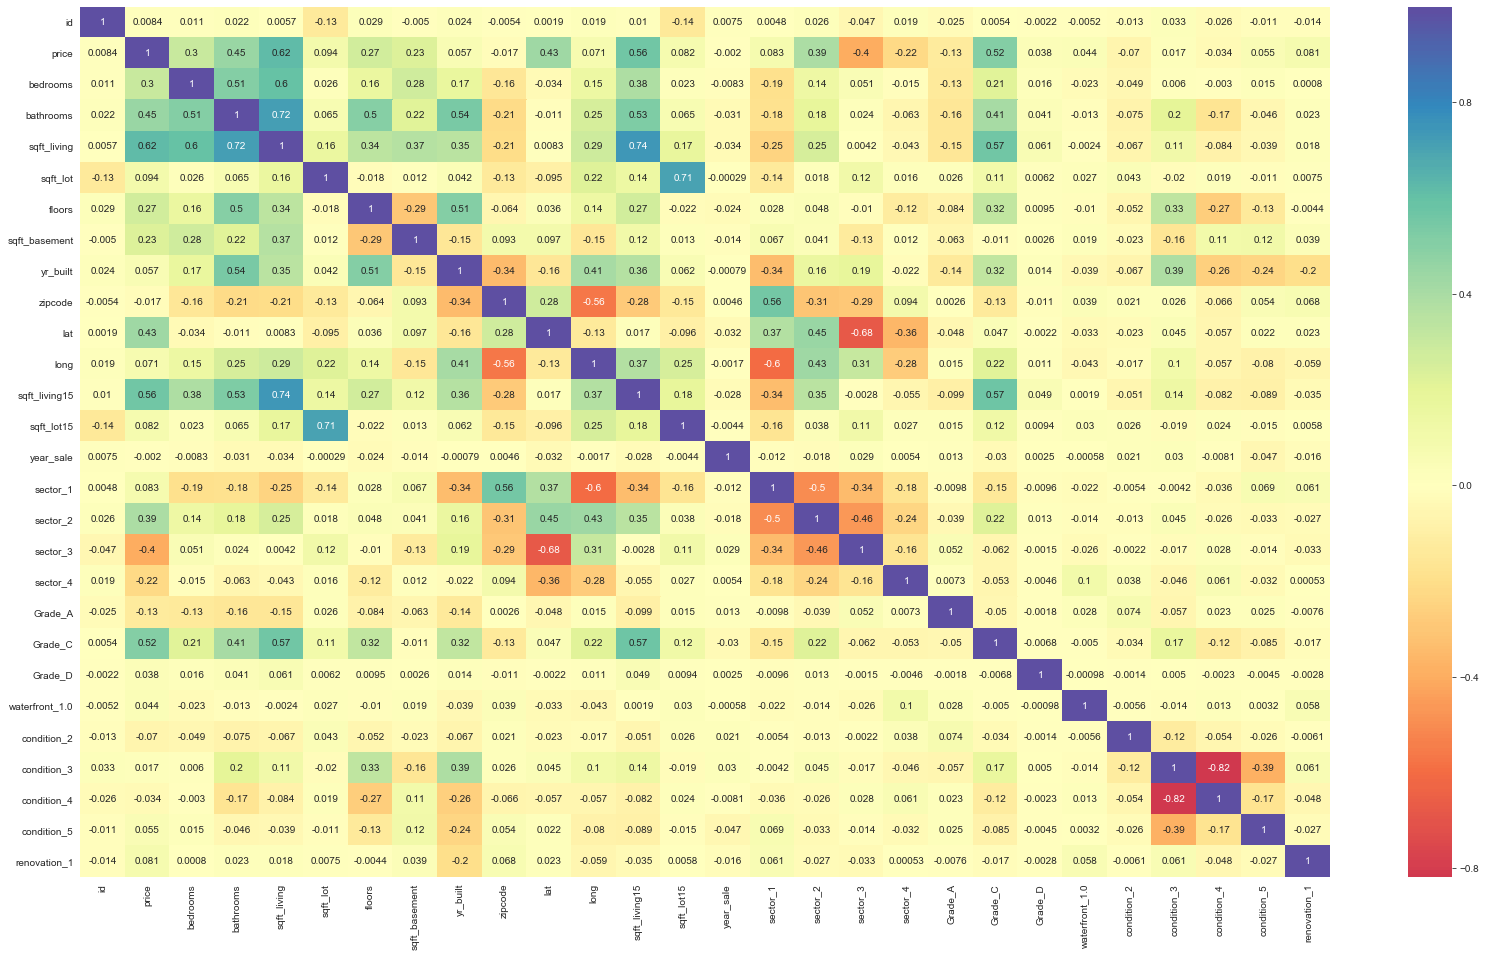

In [17]:
# Finally to complement the two previous functions, this heatmap correlates all 
# the columns and has their correlation coefficients on top of each. The values 
# From here I can already start determining which columns I will drop and which 
# I can work with

plt.figure(figsize=(28,16))
ax = sns.heatmap(df1.corr(), center=0, cmap='Spectral', annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.show()

<b>Observations</b>: There is quite a high correlation coefficient between the condition_3 and 4, therefore I will have to drop one of both. Possibility of multicollinearity is also present between sqft_living, sqft_living15, bedrooms, and possibly price and/or bedrooms has collinearity, or simply a good correlation between these last 3

The data type of the new dummy columns is uint8, which doesn't allow the linear regression to run. Therefore I will need to change them to int32 and also correct the waterfront_1.0 to waterfront_1 for the same reasons

In [18]:
for column in df1.columns:
    if df1[column].dtype == 'uint8':
        df1[column] = df1[column].astype('int32')
print(df1.dtypes)

id                  int64
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
sqft_basement     float64
yr_built            int64
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
year_sale           int64
sector_1          float64
sector_2          float64
sector_3          float64
sector_4          float64
Grade_A           float64
Grade_C           float64
Grade_D           float64
waterfront_1.0      int32
condition_2         int32
condition_3         int32
condition_4         int32
condition_5         int32
renovation_1        int32
dtype: object


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20240 entries, 0 to 21596
Data columns (total 28 columns):
id                20240 non-null int64
price             20240 non-null float64
bedrooms          20240 non-null int64
bathrooms         20240 non-null float64
sqft_living       20240 non-null int64
sqft_lot          20240 non-null int64
floors            20240 non-null float64
sqft_basement     20240 non-null float64
yr_built          20240 non-null int64
zipcode           20240 non-null int64
lat               20240 non-null float64
long              20240 non-null float64
sqft_living15     20240 non-null int64
sqft_lot15        20240 non-null int64
year_sale         20240 non-null int64
sector_1          20240 non-null float64
sector_2          20240 non-null float64
sector_3          20240 non-null float64
sector_4          20240 non-null float64
Grade_A           20240 non-null float64
Grade_C           20240 non-null float64
Grade_D           20240 non-null float64
waterfr

In [20]:
df2 = df1.copy() # df2 will be our dataframe for the modeling.

In [21]:
df2 = df2.rename(columns={'waterfront_1.0': 'waterfront_1'})

## Model 1: Fitting

From thee heatmap and the correlation values I can see that there are two variablea/features that I will need to drop for the model on top of the price (target) and the id. these are the condition_4 and the Grade_D. 

In [22]:
outcome = 'price'
x_cols = df2.drop([ 'price'], axis=1).columns
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors

model = smf.ols(formula=formula, data=df2).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                     OLS                    Adj. R-squared:           0.699      
Dependent Variable:        price                  AIC:                      528485.0348
Date:                      2020-07-25 11:54       BIC:                      528706.6664
No. Observations:          20240                  Log-Likelihood:           -2.6421e+05
Df Model:                  27                     F-statistic:              1746.      
Df Residuals:              20212                  Prob (F-statistic):       0.00       
R-squared:                 0.700                  Scale:                    1.2787e+10 
---------------------------------------------------------------------------------------
                  Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
---------------------------------------------------------------------------------------
Intercept     -37852897.2012 3972507.6912  -9.5287 0.0000 -45639335.4828 -30066458.9197
id                    0.0000       0.0000   0.3793 0.7045        -0.0000         0.0000
bedrooms         -12225.0292    1189.6443 -10.2762 0.0000    -14556.8288     -9893.2295
bathrooms         32051.9890    1954.2472  16.4012 0.0000     28221.5056     35882.4725
sqft_living          95.9519       2.3605  40.6492 0.0000        91.3251       100.5786
sqft_lot              0.3031       0.0283  10.7097 0.0000         0.2476         0.3585
floors            26869.1726    2175.4371  12.3512 0.0000     22605.1389     31133.2063
sqft_basement        -6.8206       2.7017  -2.5245 0.0116       -12.1162        -1.5249
yr_built          -1171.2183      43.1578 -27.1381 0.0000     -1255.8110     -1086.6256
zipcode            -189.2562      20.0599  -9.4345 0.0000      -228.5753      -149.9371
lat              179363.1721   10443.1091  17.1753 0.0000    158893.8287    199832.5155
long             -81270.1411    9028.4962  -9.0015 0.0000    -98966.7283    -63573.5539
sqft_living15        70.6878       2.1313  33.1672 0.0000        66.5104        74.8652
sqft_lot15           -0.1050       0.0433  -2.4231 0.0154        -0.1899        -0.0201
year_sale         19978.9945    1703.1978  11.7303 0.0000     16640.5881     23317.4008
sector_1          34361.9254   10918.7125   3.1471 0.0017     12960.3605     55763.4902
sector_2          16338.8127   11006.5300   1.4845 0.1377     -5234.8815     37912.5069
sector_3        -124844.4987   11212.3265 -11.1346 0.0000   -146821.5709   -102867.4265
sector_4        -124679.6694   11424.3587 -10.9135 0.0000   -147072.3419   -102286.9968
Grade_A          -57544.4559    7278.3385  -7.9063 0.0000    -71810.5915    -43278.3204
Grade_C          100387.7984    2918.5593  34.3964 0.0000     94667.1846    106108.4122
Grade_D           60466.9280   50848.9780   1.1891 0.2344    -39201.2061    160135.0621
waterfront_1     174857.0856   12960.7698  13.4913 0.0000    149452.9224    200261.2489
condition_2       56823.8783   23610.1289   2.4068 0.0161     10546.1048    103101.6519
condition_3       96543.5757   21961.7119   4.3960 0.0000     53496.8335    139590.3178
condition_4      127316.2163   21964.7626   5.7964 0.0000     84263.4945    170368.9382
condition_5      156791.2657   22099.9376   7.0946 0.0000    113473.5899    200108.9414
renovation_1      45657.7914    4866.9844   9.3811 0.0000     36118.1060     55197.4769
---------------------------------------------------------------------------------------
Omnibus:                  1527.661           Durbin-Watson:              1.987         
Prob(Omnibus):            0.000              Jarque-Bera (JB):           2709.108      
Skew:                     0.555              Prob(JB):                   0.000         
Kurtosis:                 4.407              Condition No.:              27136305157832
===================

### Model 1: Initial Refinement

There isn't much added for this initial refinement but a few categories that are being dropped which were identified mainly with the heatmap due to their high correlation values as being high candidates for collinearity. Still I will run a variance inflation factor later on to check for collinearity once again after a few more refinements.

In [23]:
outcome = 'price'
x_cols = df2.drop([ 'price', 'id', 'condition_4', 'Grade_D'], axis=1).columns
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors

model = smf.ols(formula=formula, data=df2).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                     OLS                    Adj. R-squared:           0.699      
Dependent Variable:        price                  AIC:                      528514.1853
Date:                      2020-07-25 11:54       BIC:                      528712.0707
No. Observations:          20240                  Log-Likelihood:           -2.6423e+05
Df Model:                  24                     F-statistic:              1959.      
Df Residuals:              20215                  Prob (F-statistic):       0.00       
R-squared:                 0.699                  Scale:                    1.2807e+10 
---------------------------------------------------------------------------------------
                  Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
---------------------------------------------------------------------------------------
Intercept     -37593316.1423 3974617.7140  -9.4583 0.0000 -45383890.1710 -29802742.1136
bedrooms         -12221.3174    1189.7526 -10.2721 0.0000    -14553.3294     -9889.3055
bathrooms         32105.1118    1955.6601  16.4165 0.0000     28271.8590     35938.3646
sqft_living          96.2958       2.3564  40.8654 0.0000        91.6771       100.9146
sqft_lot              0.2999       0.0283  10.6058 0.0000         0.2445         0.3554
floors            26648.8533    2176.1506  12.2459 0.0000     22383.4211     30914.2854
sqft_basement        -6.8489       2.7008  -2.5359 0.0112       -12.1426        -1.5551
yr_built          -1166.2731      43.1805 -27.0092 0.0000     -1250.9104     -1081.6357
zipcode            -189.8331      20.0756  -9.4559 0.0000      -229.1829      -150.4833
lat              179011.4248   10442.8041  17.1421 0.0000    158542.6795    199480.1702
long             -80960.1444    9011.8863  -8.9837 0.0000    -98624.1747    -63296.1141
sqft_living15        70.4011       2.1320  33.0208 0.0000        66.2221        74.5800
sqft_lot15           -0.1030       0.0432  -2.3821 0.0172        -0.1877        -0.0182
year_sale         19963.2863    1704.4739  11.7123 0.0000     16622.3789     23304.1937
sector_1          35383.6263   10926.0036   3.2385 0.0012     13967.7705     56799.4822
sector_2          17218.5910   11013.9236   1.5633 0.1180     -4369.5952     38806.7771
sector_3        -123937.5003   11217.2848 -11.0488 0.0000   -145924.2910   -101950.7096
sector_4        -123865.9453   11432.2148 -10.8348 0.0000   -146274.0162   -101457.8744
Grade_A          -61525.5476    7249.3779  -8.4870 0.0000    -75734.9179    -47316.1772
Grade_C          100243.6357    2914.4011  34.3960 0.0000     94531.1726    105956.0989
waterfront_1     173819.3697   12969.8560  13.4018 0.0000    148397.3968    199241.3425
condition_2      -69383.3179    9132.4260  -7.5975 0.0000    -87283.6158    -51483.0201
condition_3      -30202.6440    2019.0129 -14.9591 0.0000    -34160.0735    -26245.2145
condition_5       30131.1092    3320.1226   9.0753 0.0000     23623.3989     36638.8195
renovation_1      45626.2497    4870.2536   9.3684 0.0000     36080.1564     55172.3429
---------------------------------------------------------------------------------------
Omnibus:                   1513.277             Durbin-Watson:                1.985    
Prob(Omnibus):             0.000                Jarque-Bera (JB):             2714.589 
Skew:                      0.547                Prob(JB):                     0.000    
Kurtosis:                  4.422                Condition No.:                502011953
=======================================================================================
* The condition number is large (5e+08). This might indicate             strong
multicollinearity or other numerical problems.
"""

Not much changed by dropping those categories. The p-values are all under 0.05 which is something that I was expecting after filtering the data using the correlation matrix and the heatmap as guides. This is a good starting point as it is a suggestion that most, if not all of those variables, can be substantially influential.  The R-square is not bad by being close to 0.7 but it is not the best, so I will work with this for the time being and see what the next steps will give and if it improves.

### Model 1: Checking for Multicollinearity

Collinearity and multicollinearity has been initially addressed by looking at the correlation matrix and the heatmap using as guidelines the correlation coefficients and color coding. Multicollinearity was assessed by looking at the relationship between 3 or more variables. An additional test that can be done is the "variance inflation factor" (vif). Typically variables with a vif of 5 or greater (or more definitively 10 or greater) are displaying multicollinearity with other variables. Let's run a vif and compare it to what the previous fit is suggesting with all our p-values below the threshold of 0.05:

In [24]:
X = df2[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 26.53087893900977),
 ('bathrooms', 28.51859294056962),
 ('sqft_living', 39.47534245335814),
 ('sqft_lot', 2.309400043791766),
 ('floors', 18.477652464968063),
 ('sqft_basement', 2.67199400247503),
 ('yr_built', 11280.68002022235),
 ('zipcode', 5112242.693839521),
 ('lat', 389094.2131071722),
 ('long', 1859365.7252762215),
 ('sqft_living15', 29.21612054465244),
 ('sqft_lot15', 2.5375181850525865),
 ('year_sale', 4872055.997291688),
 ('sector_1', 51.07681585073177),
 ('sector_2', 77.10105296424797),
 ('sector_3', 47.94214001298911),
 ('sector_4', 16.183372295814213),
 ('Grade_A', 1.0748152205752493),
 ('Grade_C', 2.115440350219273),
 ('waterfront_1', 1.0241683290094654),
 ('condition_2', 1.0411028803600193),
 ('condition_3', 4.147820281360363),
 ('condition_5', 1.3264621079358612),
 ('renovation_1', 1.1452389746414375)]

### Model 2: Alternative Model with Reduced Multicollinearity

While the p-values suggest that all of the current variables are impactful, the vif indicates that there is a large multicollinearity between some of our variables. Knowing this, it makes sense to fit again the model dropping the variables with a vif greater than 5. 

In [25]:
outcome = 'price'
x_cols = df2.drop(['price', 'id', 'condition_4', 'Grade_D', 'bathrooms', 'sqft_lot15', 'bedrooms', 'floors', 'yr_built', 'lat', 'long', 'sqft_living15', 'year_sale', 'sqft_living'], axis=1).columns
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors

model = smf.ols(formula=formula, data=df2).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
====================================================================================
Model:                    OLS                   Adj. R-squared:          0.534      
Dependent Variable:       price                 AIC:                     537354.0430
Date:                     2020-07-25 11:54      BIC:                     537472.7742
No. Observations:         20240                 Log-Likelihood:          -2.6866e+05
Df Model:                 14                    F-statistic:             1657.      
Df Residuals:             20225                 Prob (F-statistic):      0.00       
R-squared:                0.534                 Scale:                   1.9831e+10 
------------------------------------------------------------------------------------
                  Coef.       Std.Err.      t     P>|t|      [0.025        0.975]   
------------------------------------------------------------------------------------
Intercept     20035770.6810 2293473.8385   8.7360 0.0000 15540375.5315 24531165.8306
sqft_lot             0.4360       0.0252  17.3053 0.0000        0.3866        0.4854
sqft_basement       84.8838       2.5147  33.7547 0.0000       79.9547       89.8128
zipcode           -199.8692      23.3763  -8.5501 0.0000     -245.6886     -154.0498
sector_1         41723.3134   13564.4331   3.0759 0.0021    15135.9220    68310.7049
sector_2         50448.9610   13597.2520   3.7102 0.0002    23797.2418    77100.6802
sector_3       -151053.1736   13671.9691 -11.0484 0.0000  -177851.3444  -124255.0029
sector_4       -154119.2880   13906.7671 -11.0823 0.0000  -181377.6819  -126860.8941
Grade_A        -136807.6298    8835.2800 -15.4842 0.0000  -154125.4968  -119489.7627
Grade_C         264109.4260    2850.0818  92.6673 0.0000   258523.0339   269695.8180
waterfront_1    186177.8825   16118.4272  11.5506 0.0000   154584.4550   217771.3099
condition_2     -97879.5329   11352.5597  -8.6218 0.0000  -120131.4728   -75627.5930
condition_3     -19458.1794    2339.0091  -8.3190 0.0000   -24042.8274   -14873.5314
condition_5      39010.1309    4090.8604   9.5359 0.0000    30991.7120    47028.5497
renovation_1     87248.0451    5792.2479  15.0629 0.0000    75894.7683    98601.3219
------------------------------------------------------------------------------------
Omnibus:                  1474.121            Durbin-Watson:               1.981    
Prob(Omnibus):            0.000               Jarque-Bera (JB):            2026.556 
Skew:                     0.629               Prob(JB):                    0.000    
Kurtosis:                 3.906               Condition No.:               230248809
====================================================================================
* The condition number is large (2e+08). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [26]:
# Another test to check the new vif values:

X = df2[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('sqft_lot', 1.180682937848134),
 ('sqft_basement', 1.4949050190353472),
 ('zipcode', 187.51673273612656),
 ('sector_1', 50.83840638958945),
 ('sector_2', 75.31992467701896),
 ('sector_3', 45.576194269226484),
 ('sector_4', 15.442952710349855),
 ('Grade_A', 1.0310915054843217),
 ('Grade_C', 1.3026367497286673),
 ('waterfront_1', 1.0204009166247243),
 ('condition_2', 1.0386163624509652),
 ('condition_3', 3.602122755635343),
 ('condition_5', 1.2988717921017199),
 ('renovation_1', 1.0462382003457944)]

All values are under the 5 threshold suggesting that the multicollinearity has been eliminated.

Let's keep in mind that this is a modeling choice and not a definitely step. Clearly there are advantages and tradebacks to this approach compare to the previous one. This is simple to see, if we remove the weight components, the model's performance is substantially diminished (look at the R-squared), but the multicollinearity has been reduced. Lets look at the Normality and the errors and make a decision based on that:

### Model 2: Associated Errors and Residual Normality 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
data = df2
y = data['price']
X = data.drop(['price', 'id', 'sqft_living', 'condition_4', 'Grade_D', 'bathrooms', 'sqft_lot15', 'bedrooms', 'floors', 'yr_built', 'lat', 'long', 'sqft_living15', 'year_sale'], axis = 1)

In [29]:
# create data sets with an 80/20 split - train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [30]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 19768929723.790993
Test Mean Squarred Error: 20039511935.664673


In [31]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 140602.0260301785
Test Root Mean Squarred Error: 141560.98309797328


Now that this model has been fitted, I need to check that it's residual follow a normal (Gaussian) distribution. For this purpose I will use the following probability plot:

In [32]:
y_predicted = linreg.predict(X)

In [33]:
residuals = y - y_predicted

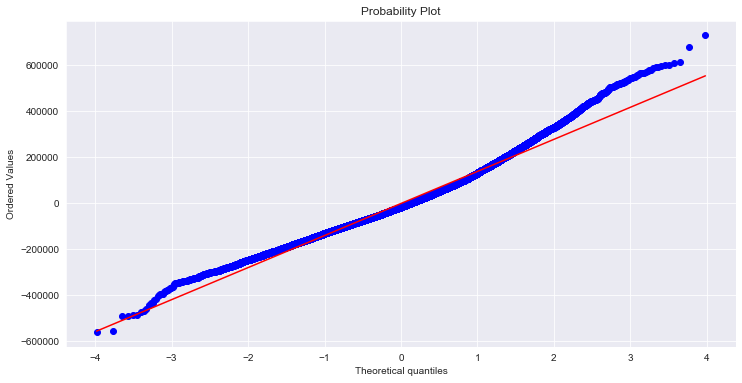

In [34]:
from scipy.stats import probplot

plt.figure(figsize=(12,6))
_ = probplot(residuals, plot=plt)

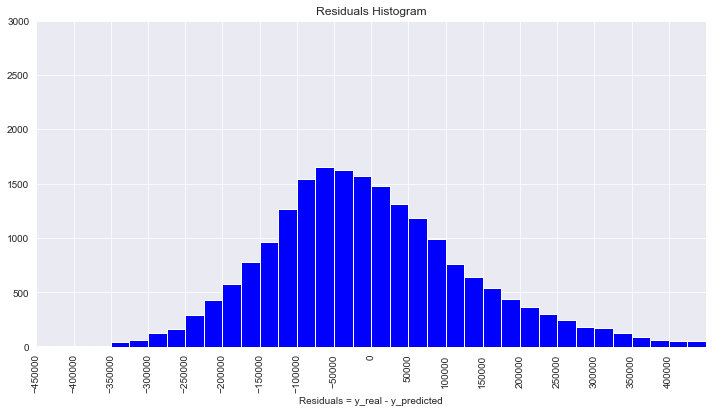

In [35]:
# Histogram for residuals

    color = 'Blue'
    plt.figure(figsize=(12,6))
    plt.hist(residuals, histtype = 'bar', range = (-500000, 500000),bins = 40, color=color)
    plt.ylim(0,3000)
    plt.xlim(-450000, 450000)
    plt.xticks((range(-450000,450000, 50000)), rotation = 'vertical')
    plt.xlabel('Residuals = y_real - y_predicted')
    plt.title('Residuals Histogram')
    plt.show()

Observations: the errors are not the smallest, specially the mse at 143358$, however, the residuals normality is not bad as shown on the probability plot and the residuals histogram. The histogram in particular shows an almost Gaussian distribution which is "slightly skewed" with a value of 0.619. The Kurstosis value of 3.911, but even when it is greater than 3, I would classify it as Mesokurtic as it is not far from 3.

At this point, I am not convinced about the R-square of this Model 2 (~0.532). this R-squared is lower by a good margin than that of Model 1.  I believe that Model 1 outperforms Model 2. However, we must not forget that Model 1 is suffers from multicollinearity which could impact its interpretation. I will run more refinements on the Model 1, calculate it's associated error and check for normality to make a proper decision on which model to keep

## Model 1: Continued Refinement

### Log-Transformations 

To continue with the model refinement I will proceed to choose some of the variables/features to log transform them. I will star by defining them, followed by log_transforming them, dropping the original ones from the initial model, and finally concatenating the new log_transformed ones to the previous dataframe. 

In [36]:
norm_candidates = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_basement']

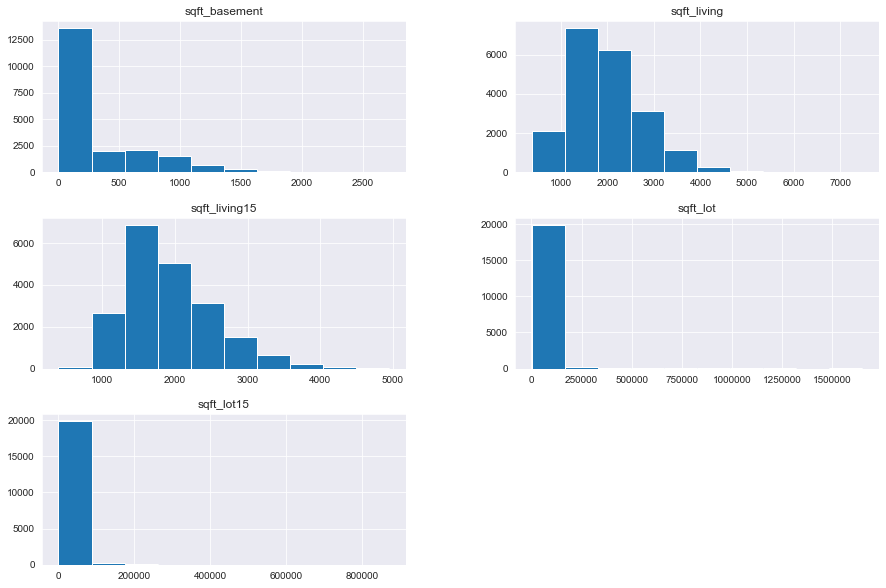

In [37]:
df2[norm_candidates].hist(figsize=(15,10));

Unfortunately the variable "sqft_basement' will not be in the candidates to log_transform as there is a high number of rows with "0" in place, and log 0 is undefined. I might try to do another transform if needed later on, but I might not take this variable into account as it is known by now that sqft_living = sqft_above + sqft_basement

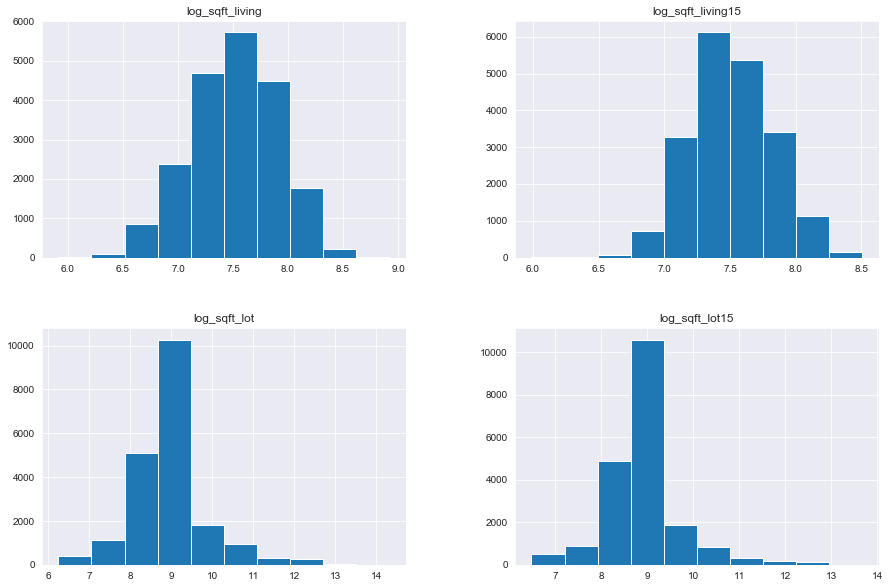

In [38]:
df_log = df2.copy()

log_sqft_living = np.log(df_log['sqft_living'])
log_sqft_living15 = np.log(df_log['sqft_living15'])
log_sqft_lot = np.log(df_log['sqft_lot'])
log_sqft_lot15 = np.log(df_log['sqft_lot15'])

logs = ['log_sqft_living', 'log_sqft_living15', 'log_sqft_lot', 'log_sqft_lot15']

df_log['log_sqft_living'] = log_sqft_living
df_log['log_sqft_living15'] = log_sqft_living15
df_log['log_sqft_lot'] = log_sqft_lot
df_log['log_sqft_lot15'] = log_sqft_lot15

df_log[logs].hist(figsize=(15,10));

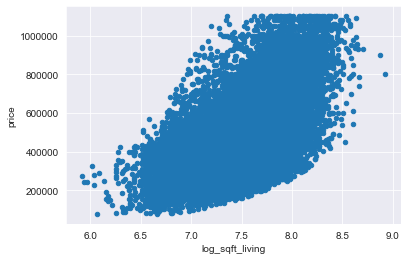

In [39]:
df_log.plot(kind = 'scatter', x = 'log_sqft_living', y = 'price')

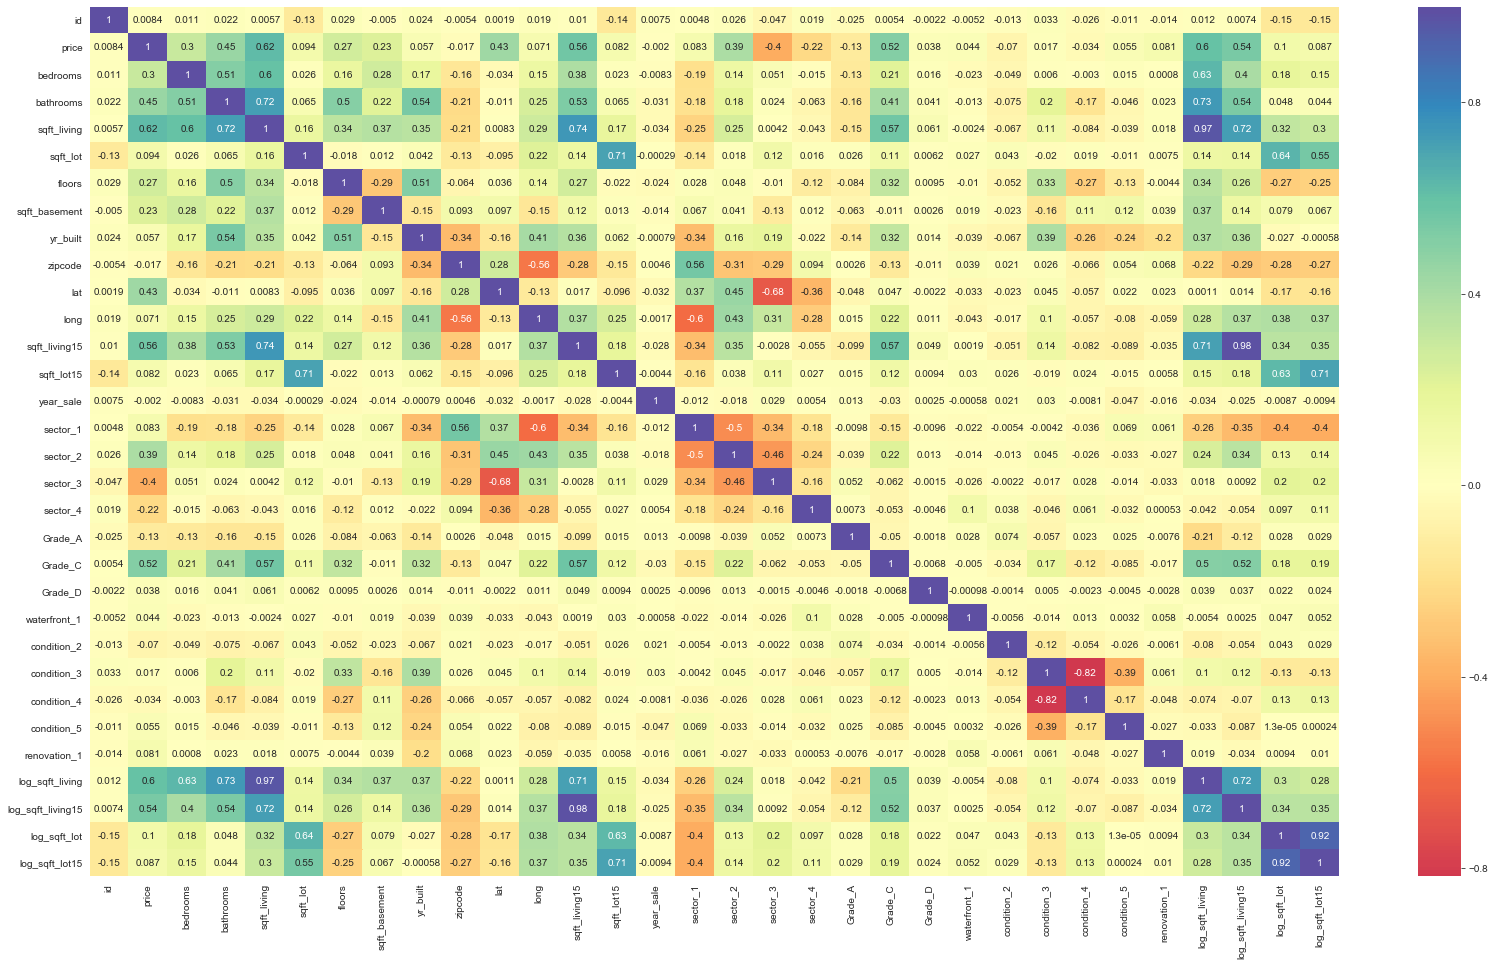

In [40]:
plt.figure(figsize=(28,16))
ax = sns.heatmap(df_log.corr(), center=0, cmap='Spectral', annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.show()

There is still a high correlation between the following pairs:
* condition_3 and condition_4 
* log_sqft_lot and log_sqft_lot15. 
* log_sqft_living and log_sqft_living15

To avoid collinearity I will have to drop one of each when fitting the model

In [41]:
df_log.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year_sale', 'sector_1', 'sector_2',
       'sector_3', 'sector_4', 'Grade_A', 'Grade_C', 'Grade_D', 'waterfront_1',
       'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'renovation_1', 'log_sqft_living', 'log_sqft_living15', 'log_sqft_lot',
       'log_sqft_lot15'],
      dtype='object')

In [42]:
df_log = df_log.drop(['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'condition_4'], axis=1)
df_log.head()

,id,price,bedrooms,bathrooms,floors,sqft_basement,yr_built,zipcode,lat,long,year_sale,sector_1,sector_2,sector_3,sector_4,Grade_A,Grade_C,Grade_D,waterfront_1,condition_2,condition_3,condition_5,renovation_1,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15
0,7129300520,221900.0,3,1.00,1.0,0.0,1955,98178,47.5112,-122.257,2014,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,7.073270,7.200425,8.639411,8.639411
1,6414100192,538000.0,3,2.25,2.0,400.0,1951,98125,47.7210,-122.319,2014,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,7.851661,7.432484,8.887653,8.941022
2,5631500400,180000.0,2,1.00,1.0,0.0,1933,98028,47.7379,-122.233,2015,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,6.646391,7.908387,9.210340,8.994917
3,2487200875,604000.0,4,3.00,1.0,910.0,1965,98136,47.5208,-122.393,2014,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,7.580700,7.215240,8.517193,8.517193
4,1954400510,510000.0,3,2.00,1.0,0.0,1987,98074,47.6168,-122.045,2015,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,7.426549,7.495542,8.997147,8.923058


At this point, with the log_tranformed variables in the new dataframe, I will run another heatmap with correlation coefficients to compare it with the previous one and address possible collinearity and multicollinearity again

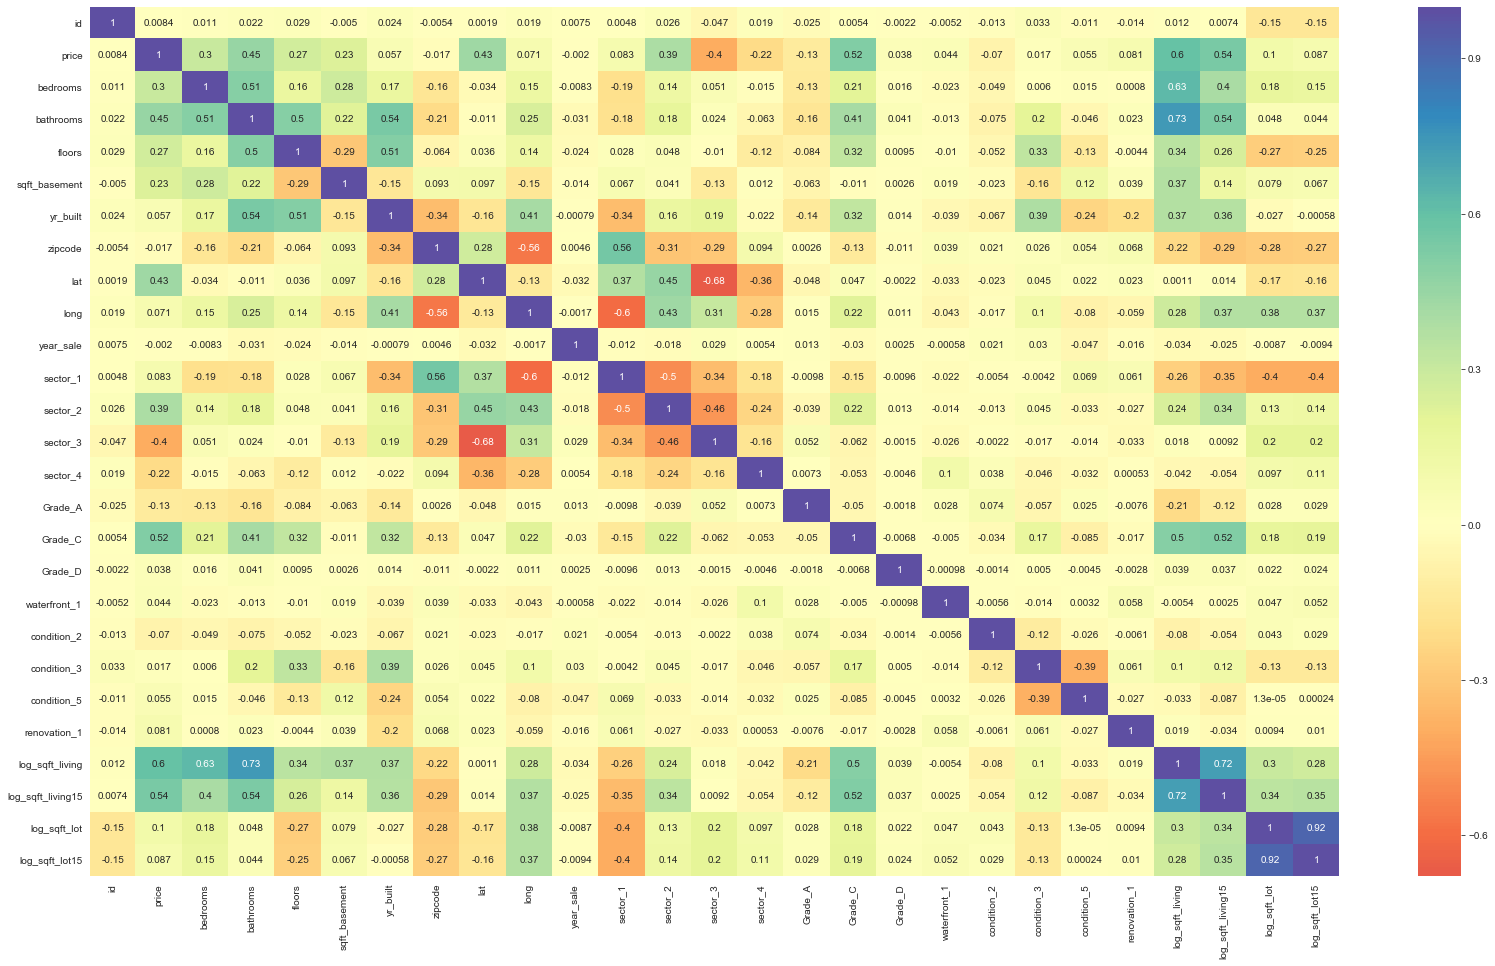

In [43]:
plt.figure(figsize=(28,16))
ax = sns.heatmap(df_log.corr(), center=0, cmap='Spectral', annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.show()

In [44]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20240 entries, 0 to 21596
Data columns (total 27 columns):
id                   20240 non-null int64
price                20240 non-null float64
bedrooms             20240 non-null int64
bathrooms            20240 non-null float64
floors               20240 non-null float64
sqft_basement        20240 non-null float64
yr_built             20240 non-null int64
zipcode              20240 non-null int64
lat                  20240 non-null float64
long                 20240 non-null float64
year_sale            20240 non-null int64
sector_1             20240 non-null float64
sector_2             20240 non-null float64
sector_3             20240 non-null float64
sector_4             20240 non-null float64
Grade_A              20240 non-null float64
Grade_C              20240 non-null float64
Grade_D              20240 non-null float64
waterfront_1         20240 non-null int32
condition_2          20240 non-null int32
condition_3          2024

In [45]:
x_cols = df_log.drop(['price', 'id', 'sector_2', 'Grade_D'], axis=1).columns
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors

model = smf.ols(formula=formula, data=df_log).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Ordinary least squares
===========================================================================================
Model:                       OLS                     Adj. R-squared:            0.697      
Dependent Variable:          price                   AIC:                       528677.7242
Date:                        2020-07-25 11:54        BIC:                       528867.6941
No. Observations:            20240                   Log-Likelihood:            -2.6431e+05
Df Model:                    23                      F-statistic:               2021.      
Df Residuals:                20216                   Prob (F-statistic):        0.00       
R-squared:                   0.697                   Scale:                     1.2911e+10 
-------------------------------------------------------------------------------------------
                      Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
-------------------------------------------------------------------------------------------
Intercept         -38470834.2542 3994881.6158  -9.6300 0.0000 -46301127.1556 -30640541.3529
bedrooms             -15854.4227    1211.1732 -13.0901 0.0000    -18228.4206    -13480.4248
bathrooms             30086.0615    1977.7948  15.2119 0.0000     26209.4228     33962.7002
floors                25362.5111    2318.5315  10.9390 0.0000     20818.0007     29907.0215
sqft_basement            -6.5020       2.7214  -2.3892 0.0169       -11.8361        -1.1678
yr_built              -1218.1727      43.6582 -27.9025 0.0000     -1303.7464     -1132.5991
zipcode                -157.5180      20.1244  -7.8272 0.0000      -196.9633      -118.0726
lat                  168244.7654   10537.2661  15.9666 0.0000    147590.8668    188898.6639
long                 -51354.6907    9119.0340  -5.6316 0.0000    -69228.7390    -33480.6423
year_sale             19888.4325    1711.4626  11.6207 0.0000     16533.8267     23243.0383
sector_1              24096.9877    2848.5127   8.4595 0.0000     18513.6712     29680.3042
sector_3            -143030.9638    3386.0593 -42.2411 0.0000   -149667.9154   -136394.0122
sector_4            -137801.3209    4669.7728 -29.5092 0.0000   -146954.4555   -128648.1864
Grade_A              -20666.6916    7374.3921  -2.8025 0.0051    -35121.0999     -6212.2832
Grade_C              128066.8714    2764.1330  46.3317 0.0000    122648.9458    133484.7970
waterfront_1         177424.9644   13036.3047  13.6101 0.0000    151872.7469    202977.1820
condition_2          -58897.8966    9178.5184  -6.4169 0.0000    -76888.5392    -40907.2540
condition_3          -28370.7054    2032.3606 -13.9595 0.0000    -32354.2976    -24387.1133
condition_5           30440.1920    3336.1682   9.1243 0.0000     23901.0309     36979.3531
renovation_1          44170.9012    4894.1371   9.0253 0.0000     34577.9945     53763.8079
log_sqft_living      188637.5306    4694.5814  40.1820 0.0000    179435.7692    197839.2920
log_sqft_living15    136147.2684    4148.4152  32.8191 0.0000    128016.0372    144278.4996
log_sqft_lot          15691.2141    2356.2768   6.6593 0.0000     11072.7200     20309.7083
log_sqft_lot15       -14885.0631    2559.1417  -5.8164 0.0000    -19901.1890     -9868.9372
-------------------------------------------------------------------------------------------
Omnibus:                     1343.812              Durbin-Watson:                 1.979    
Prob(Omnibus):               0.000                 Jarque-Bera (JB):              2238.277 
Skew:                        0.520                 Prob(JB):                      0.000    
Kurtosis:                    4.254                 Condition No.:                 490768793
===========================================================================================
* The condition number is large (5e+08). This might indicate             strong
multicollinearity or other numerical 

The model has not increased it's R_squared, but overall it seems ok as all the p-values are below 0.05. Still remember that from the vif tests that I ran it is clear that this model will suffer from multicollinearity and this might affect up to a certain degree my interpretations. 

There is not much that I can do at this point but to look at the associated errors and normality

### Model 1: Associated Errors and Residual Normality

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = df_log
y = data['price']
X = data.drop(['price', 'id'], axis = 1)

In [47]:
# create data sets with an 80/20 split - train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [48]:
len(y_test)

4048

In [49]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 13011623628.485476
Test Mean Squarred Error: 12400827837.224


In [50]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 114068.50410382997
Test Root Mean Squarred Error: 111359.00429342929


The associated errors are considerably smaller by having an mse of 116758 dollars compared to the 143358 Dollars from Model 2, and the R_square is considerably higher as well going from 0.532 to 0.679 with a difference of 0.147 between them.

In [51]:
y_predicted = linreg.predict(X)

In [52]:
residuals = y -y_predicted

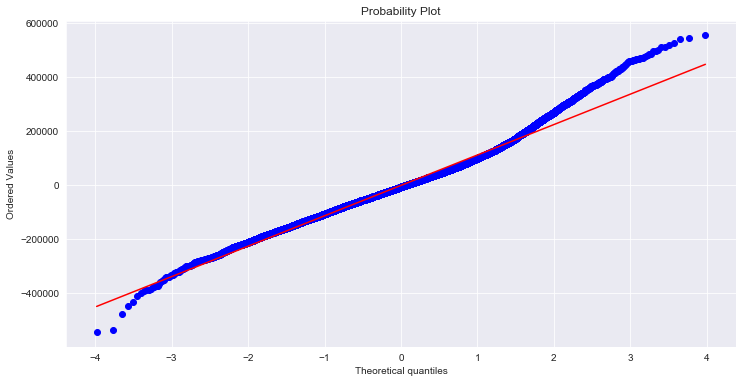

In [53]:
from scipy.stats import probplot
plt.figure(figsize=(12,6))
_ = probplot(residuals, plot=plt)

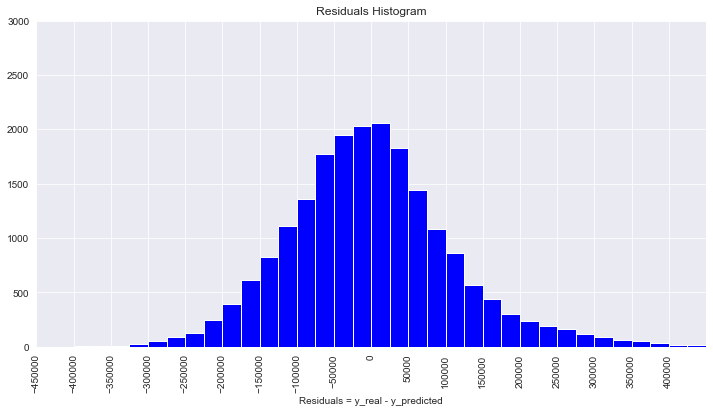

In [54]:
# Histogram for residuals

    color = 'Blue'
    plt.figure(figsize=(12,6))
    plt.hist(residuals, histtype = 'bar', range = (-500000, 500000),bins = 40, color=color)
    plt.ylim(0,3000)
    plt.xlim(-450000, 450000)
    plt.xticks((range(-450000,450000, 50000)), rotation = 'vertical')
    plt.xlabel('Residuals = y_real - y_predicted')
    plt.title('Residuals Histogram')
    plt.show()

The probability plot and the residual histogram are very close to each other. It is hard to see the difference between the two probability plots. For the histograms the main difference are the Skewness and the Kurtosis. Model 1 has a skewness of 0.544, so it is slightly less skewed to the right than Model 2, and it has a Kurtosis of 4.389 which suggest it is Leptokurtic, although the difference between one and the other is not too big. 

As commented above, I will keep Model 1 since it's R_square suggests it is outperforming Model 2. If time permits it, I will try to work more on Model 2 with other refinements but for the time being I'll stick to Model 1.

The next plot will give us an idea of the actual/real versus the predicted values:

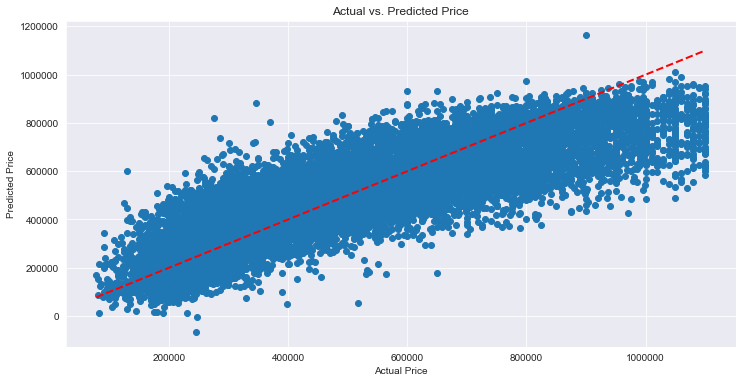

In [55]:
from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(linreg, X, y, cv=10)

fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_title('Actual vs. Predicted Price')
ax.set_xlabel('Actual Price')
ax.set_ylabel('Predicted Price')
plt.show()

The "Actual vs. Predicted Price" plot suggests that the model is acceptable up to about 600 thousand Dollars, but afterwards, the error increases. Maybe more refinement will be needed, or exploring other options by dealing with the multicollinearity is a better way. 

It is important to keep in mind that I put a threshold at 1.1 million $ and even though I tested the 1.2 and 1.3 million Dollars thresholds, not many differences where found. Maybe an alternative could be increasing the numbers of sectors (?) or treating this problem by zipcodes which would bee my preferred approach although we have been indicated not to do so due to the large number (70). 

Another option which I tested on a separate notebook is to focus the cleaning on eliminating the outliers by using the 3 standard deviation rule. This reduces the number of samples to just under 20000 which is not a a big percentage. However the R-squared of this model was considerably lower. Again, maybe more time dedicated to that model (Model 3) would give better results.

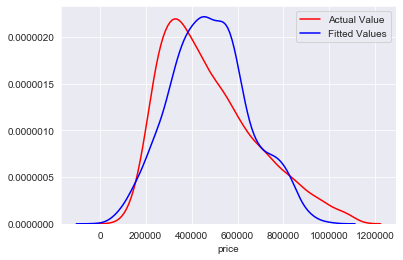

In [56]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat_test, hist=False, color="b", label="Fitted Values" , ax=ax1)

As mentioned above, and as this plot suggests, after around 600000 Dollars the model is not great. In fact, after around 500000 Dollars there is the possibility of a strong mismatch as the blue curve shows compared to the actual value (in red).

### Model 1: Further Refinement

As a final attempt to refine Model 1 I will look at the price range distribution and see if by lowering the threshold to 1 million dollars I can improve the model and if so, how much will my value range be affected in terms of percentage.

for this purpose I'll first look at the price distribution on a histogram:

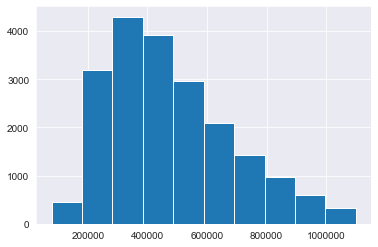

In [57]:
df_log.price.hist()

In [58]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df_log.price.quantile(q=q)))

0.8 percentile: 650000.0
0.81 percentile: 660000.0
0.82 percentile: 674950.0
0.83 percentile: 685000.0
0.84 percentile: 699000.0
0.85 percentile: 710000.0
0.86 percentile: 724270.0000000005
0.87 percentile: 735000.0
0.88 percentile: 750000.0
0.89 percentile: 765000.0
0.9 percentile: 780000.0
0.91 percentile: 799696.0000000007
0.92 percentile: 815000.0
0.93 percentile: 835000.0
0.94 percentile: 855000.0
0.95 percentile: 880000.0
0.96 percentile: 910000.0
0.97 percentile: 940829.9999999981
0.98 percentile: 979700.0
0.99 percentile: 1040000.0


In [59]:
orig_tot = len(df_log)
df_log = df_log[df_log.price < 1000000] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df_log))/orig_tot)
#df_log.price = df_log.price.map(np.log) # Applying a log transformation
train, test = train_test_split(df_log)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df_log).fit()
model.summary()

Percent removed: 0.015069169960474308


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     1955.
Date:                Sat, 25 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:54:57   Log-Likelihood:            -2.5935e+05
No. Observations:               19935   AIC:                         5.187e+05
Df Residuals:                   19911   BIC:                         5.189e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3.474e+07   3.83e+06     -9.067      0.000   -4.22e+07   -2.72e+07
bedrooms          -1.442e+04   1163.958    -12.386      0.000   -1.67e+04   -1.21e+04
bathrooms          2.752e+04   1911.237     14.399      0.000    2.38e+04    3.13e+04
floors             2.383e+04   2227.972     10.697      0.000    1.95e+04    2.82e+04
sqft_basement        -9.0326      2.636     -3.427      0.001     -14.199      -3.866
yr_built          -1154.4199     42.052    -27.452      0.000   -1236.846   -1071.994
zipcode            -151.8224     19.283     -7.874      0.000    -189.618    -114.027
lat                1.729e+05   1.01e+04     17.167      0.000    1.53e+05    1.93e+05
long              -3.281e+04   8731.457     -3.758      0.000   -4.99e+04   -1.57e+04
year_sale          1.875e+04   1641.188     11.425      0.000    1.55e+04     2.2e+04
sector_1           2.637e+04   2733.862      9.647      0.000     2.1e+04    3.17e+04
sector_3          -1.379e+05   3236.648    -42.616      0.000   -1.44e+05   -1.32e+05
sector_4          -1.297e+05   4462.947    -29.061      0.000   -1.38e+05   -1.21e+05
Grade_A            -2.38e+04   7022.415     -3.389      0.001   -3.76e+04      -1e+04
Grade_C            1.183e+05   2684.944     44.075      0.000    1.13e+05    1.24e+05
waterfront_1       1.764e+05   1.27e+04     13.942      0.000    1.52e+05    2.01e+05
condition_2        -5.78e+04   8737.418     -6.615      0.000   -7.49e+04   -4.07e+04
condition_3       -2.694e+04   1947.089    -13.837      0.000   -3.08e+04   -2.31e+04
condition_5        2.724e+04   3213.138      8.479      0.000    2.09e+04    3.35e+04
renovation_1        3.99e+04   4746.025      8.407      0.000    3.06e+04    4.92e+04
log_sqft_living    1.832e+05   4510.812     40.620      0.000    1.74e+05    1.92e+05
log_sqft_living15  1.308e+05   3997.484     32.720      0.000    1.23e+05    1.39e+05
log_sqft_lot       1.483e+04   2261.425      6.558      0.000    1.04e+04    1.93e+04
log_sqft_lot15    -1.447e+04   2453.257     -5.900      0.000   -1.93e+04   -9665.149
==============================================================================
Omnibus:                      934.442   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1421.741
Skew:                           0.423   Prob(JB):                    1.87e-309
Kurtosis:                       3.997   Cond. No.                     4.91e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.91e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

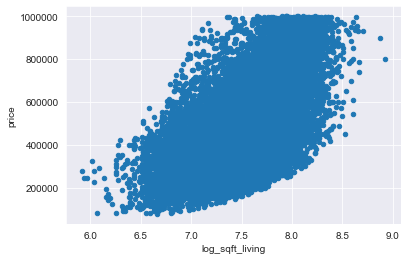

In [60]:
df_log.plot(kind = 'scatter', x = 'log_sqft_living', y = 'price')

### Model 1: Final Errors & Residuals

In [61]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 13011623628.485476
Test Mean Squarred Error: 12400827837.224


In [62]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 114068.50410382997
Test Root Mean Squarred Error: 111359.00429342929


The mse didn't change at all, and the R-squared is the same, so we will stop the testing here to avoid over-fitting it 

Comments on the probabilities and residual distribution are below after both plots

In [63]:
y_predicted = linreg.predict(X)

In [64]:
residuals = y -y_predicted

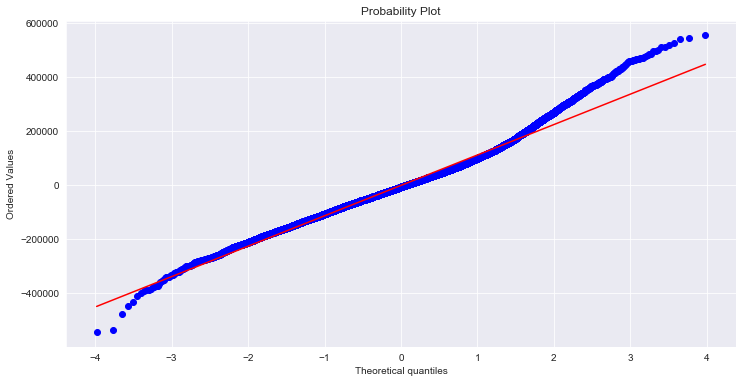

In [65]:
plt.figure(figsize=(12,6))
_ = probplot(residuals, plot=plt)

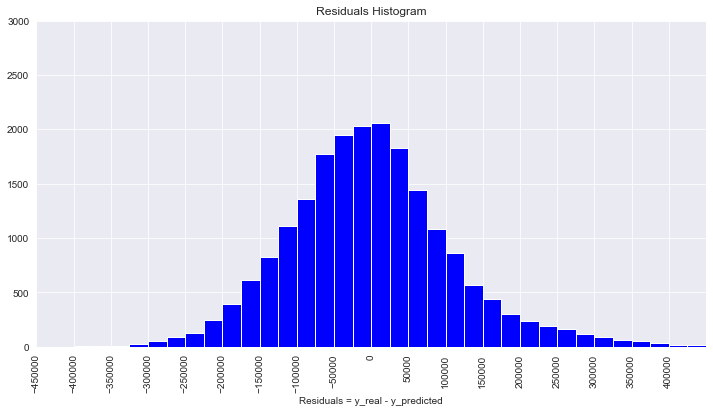

In [66]:
# Histogram for residuals

    color = 'Blue'
    plt.figure(figsize=(12,6))
    plt.hist(residuals, histtype = 'bar', range = (-500000, 500000),bins = 40, color=color)
    plt.ylim(0,3000)
    plt.xlim(-450000, 450000)
    plt.xticks((range(-450000,450000, 50000)), rotation = 'vertical')
    plt.xlabel('Residuals = y_real - y_predicted')
    plt.title('Residuals Histogram')
    plt.show()

The probability plot is almost the same as before as well as the residuals histogram. The skewness had a slight improvement changing to 0.443 as well as the Kurtosis to 4.113, so not much change with the small improvements achieved . 

Finally the Actual vs. Predicted Price plot is below, which again suggest that not much has changed, with good predictions up to around 600000 Dollars.

Additional comments on the README


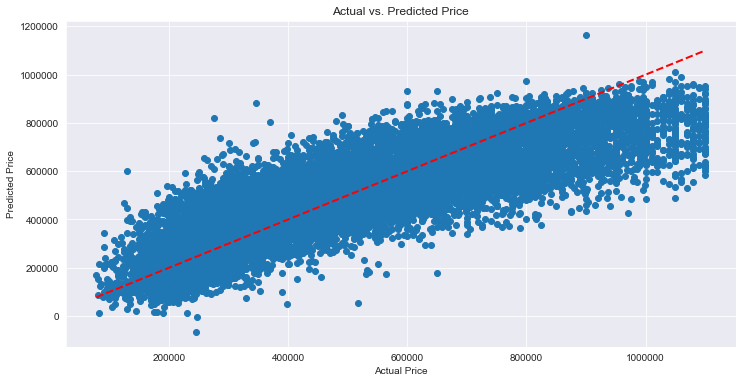

In [67]:
predicted = cross_val_predict(linreg, X, y, cv=10)

fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_title('Actual vs. Predicted Price')
ax.set_xlabel('Actual Price')
ax.set_ylabel('Predicted Price')
plt.show()

In [68]:
df_log.head()

,id,price,bedrooms,bathrooms,floors,sqft_basement,yr_built,zipcode,lat,long,year_sale,sector_1,sector_2,sector_3,sector_4,Grade_A,Grade_C,Grade_D,waterfront_1,condition_2,condition_3,condition_5,renovation_1,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15
0,7129300520,221900.0,3,1.00,1.0,0.0,1955,98178,47.5112,-122.257,2014,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,7.073270,7.200425,8.639411,8.639411
1,6414100192,538000.0,3,2.25,2.0,400.0,1951,98125,47.7210,-122.319,2014,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,7.851661,7.432484,8.887653,8.941022
2,5631500400,180000.0,2,1.00,1.0,0.0,1933,98028,47.7379,-122.233,2015,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,6.646391,7.908387,9.210340,8.994917
3,2487200875,604000.0,4,3.00,1.0,910.0,1965,98136,47.5208,-122.393,2014,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,7.580700,7.215240,8.517193,8.517193
4,1954400510,510000.0,3,2.00,1.0,0.0,1987,98074,47.6168,-122.045,2015,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,7.426549,7.495542,8.997147,8.923058


================================================================================================

================================================================================================

Additional calculation for later analysis...

In [69]:
df2.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year_sale,sector_1,sector_2,sector_3,sector_4,Grade_A,Grade_C,Grade_D,waterfront_1,condition_2,condition_3,condition_4,condition_5,renovation_1
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,1955,98178,47.5112,-122.257,1340,5650,2014,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,400.0,1951,98125,47.7210,-122.319,1690,7639,2014,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,1933,98028,47.7379,-122.233,2720,8062,2015,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,910.0,1965,98136,47.5208,-122.393,1360,5000,2014,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,1987,98074,47.6168,-122.045,1800,7503,2015,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0


In [70]:
df_log.price.mean()

468468.61254075746

In [71]:
df2.to_csv('df2.csv')